#### Greg Walsh
#### DSSA-5104-091 - DEEP LEARNING
### Spring 2020
#### Pima Indians - diabetes prediction
#### Neural Network for binary classification


In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

Using TensorFlow backend.


In [ ]:
# LR 0.001
# Reset our variables 
scores = None 
Y_predict = None
adam = None
rounded = None
y_pred = None 
history = None
model = None

# create model (requires completion)
model = Sequential()
#12 neurons using relu activation function
model.add(Dense(12, input_dim=8,activation='relu')) 
# 8 neurons using relu activation function
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
#Single neuron used to produce a probability output in range of 0 to 1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 

# Compile model (requires completion)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early stopping monitor is a keras lib that will see if the model is changing and if not end it 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=1)

# Fit the model (requires completion)
history = model.fit(X,Y,epochs=1000,batch_size=10, verbose=0, callbacks=[early_stopping_monitor])

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

# Accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

# Confusion Matrix
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

# Confusion Matrix will look at the quality of our outputs from the NN. 0,0 and 1,1 are what we strive for.
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives:',CM[0,0])  # No and predicted No | we like this
print('False negatives:',CM[1,0]) # Yes but predicted No | This is horrible. We want least amount of these.
print('False positives:',CM[0,1]) # No but predicted Yes | This is okay for this use case.
print('True positives:',CM[1,1])  # Yes and predicted Yes | we like this

In [ ]:
#Plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs with LR of 0.001')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.text(0,0, 'Model Accuracy and Loss of the \nPima Indian Dataset.\nAccuracy increases with more epochs.\nLoss decreases with more epochs')
plt.show()


plt.scatter(Y_predict,Y_predict, label = "Predicted Targets")
plt.scatter(Y,Y, label = "Observed Targets")
plt.legend()
plt.title('Observed vs Predicted Targets for 1000 Epochs with LR 0.001')
plt.show()

ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.8,label="Predicted Targets",color='red')
ax.legend()
plt.hist(Y,alpha=0.8, label="Observed Targets")
ax.legend()
plt.ylabel("total observations")
plt.xlabel("obseravtions results")
plt.title("Observed vs Predicted Targets for 1000 Epochs with LR 0.001")
plt.show()


In [2]:
# Run for learning rate 0.5 and 1000 Epochs
# Reset our variables 
scores = None 
Y_predict = None
adam = None
rounded = None
y_pred = None
history = None
model = None

# create model (requires completion)
model = Sequential()
#12 neurons using relu activation function
model.add(Dense(12, input_dim=8,activation='relu')) 
# 8 neurons using relu activation function
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
#Single neuron used to produce a probability output in range of 0 to 1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 
# Compile model (requires completion)
adam = optimizers.Adam(lr=.5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early stopping monitor is a keras lib that will see if the model is changing and if not end it 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=1)

# Fit the model (requires completion)
history = model.fit(X,Y,epochs=1000,batch_size=10, verbose=0, callbacks=[early_stopping_monitor])

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

# Accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
      
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives:',CM[0,0])  # No and predicted No | we like this
print('False negatives:',CM[1,0]) # Yes but predicted No | This is horrible. We want least amount of these.
print('False positives:',CM[0,1]) # No but predicted Yes | This is okay for this use case.
print('True positives:',CM[1,1])  # Yes and predicted Yes | we like this

768/768 [==============================] - 0s 40us/step

accuracy: 85.16%

loss: 33.78%
Confusion Matrix
True negatives: 435
False negatives: 49
False positives: 65
True positives: 219


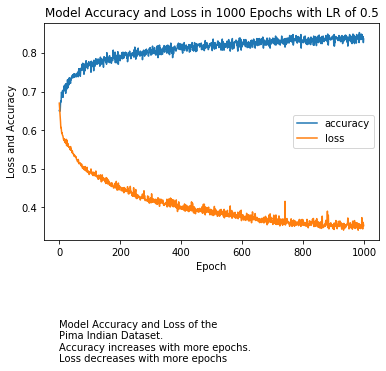

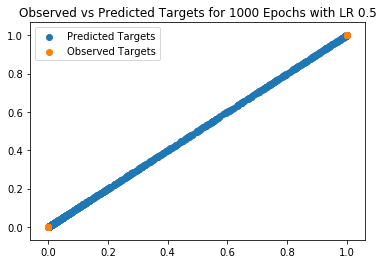

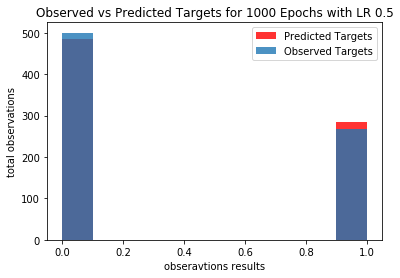

In [3]:
#Plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs with LR of 0.5')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.text(0,0, 'Model Accuracy and Loss of the \nPima Indian Dataset.\nAccuracy increases with more epochs.\nLoss decreases with more epochs')
plt.show()


plt.scatter(Y_predict,Y_predict, label = "Predicted Targets")
plt.scatter(Y,Y, label = "Observed Targets")
plt.legend()
plt.title('Observed vs Predicted Targets for 1000 Epochs with LR 0.5')
plt.show()

ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.8,label="Predicted Targets",color='red')
ax.legend()
plt.hist(Y,alpha=0.8, label="Observed Targets")
ax.legend()
plt.ylabel("total observations")
plt.xlabel("obseravtions results")
plt.title("Observed vs Predicted Targets for 1000 Epochs with LR 0.5")
plt.show()

In [ ]:
# Run for learning rate 0.1 and 1000 Epochs
# Reset our variables 
scores = None 
Y_predict = None
adam = None
rounded = None
y_pred = None 
history = None
model = None

# create model (requires completion)
model = Sequential()
#12 neurons using relu activation function
model.add(Dense(12, input_dim=8,activation='relu')) 
# 8 neurons using relu activation function
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
#Single neuron used to produce a probability output in range of 0 to 1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 

# Compile model 
adam = optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early stopping monitor is a keras lib that will see if the model is changing and if not end it 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=1)

# Fit the model 
history = model.fit(X,Y,epochs=1000,batch_size=10, verbose=0, callbacks=[early_stopping_monitor])

# Evaluate the model efficiency and performance
scores= model.evaluate(X, Y)
Y_predict= model.predict(X) 

# Accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
      
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives:',CM[0,0])  # No and predicted No | we like this
print('False negatives:',CM[1,0]) # Yes but predicted No | This is horrible. We want least amount of these.
print('False positives:',CM[0,1]) # No but predicted Yes | This is okay for this use case.
print('True positives:',CM[1,1])  # Yes and predicted Yes | we like this

In [ ]:
#Plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs with LR of 0.00001')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.text(0,0, 'Model Accuracy and Loss of the \nPima Indian Dataset.\nAccuracy increases with more epochs.\nLoss decreases with more epochs')
plt.show()


plt.scatter(Y_predict,Y_predict, label = "Predicted Targets")
plt.scatter(Y,Y, label = "Observed Targets")
plt.legend()
plt.title('Observed vs Predicted Targets for 1000 Epochs with LR 0.00001')
plt.show()

ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.8,label="Predicted Targets",color='red')
ax.legend()
plt.hist(Y,alpha=0.8, label="Observed Targets")
ax.legend()
plt.ylabel("total observations")
plt.xlabel("obseravtions results")
plt.title("Observed vs Predicted Targets for 1000 Epochs with LR 0.00001")
plt.show()

From my obersvations is seems the LR will affect the accuracy by a few percentages. It seems to have a greater impact on Loss. However from experimenting the major changes in accuracy and lower loss are running more epochs.

## 0.001

accuracy: 83.98%

loss: 35.84%

Confusion Matrix

True negatives: 421

False negatives: 44

False positives: 79

True positives: 224

## 0.5

accuracy: 81.64%

loss: 38.33%

Confusion Matrix

True negatives: 423

False negatives: 64

False positives: 77

True positives: 204

accuracy: 80.08%

## 0.00001

accuracy: 80.08%

loss: 42.13%

Confusion Matrix

True negatives: 394

False negatives: 47

False positives: 106

True positives: 221
